In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
iris['target'] = data.target

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
target = iris.pop('target')

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(gamma="auto")

cv_result = cross_val_score(svc, iris, target, cv=10, scoring="accuracy")
print("Acurácia com cross validation:", cv_result.mean()*100)

Acurácia com cross validation: 98.00000000000001


In [8]:
svc.fit(iris, target)
svc.predict([[6.9,2.8,6.1,2.3]])

array([2])

Text(0.5, 1.0, 'Iris')

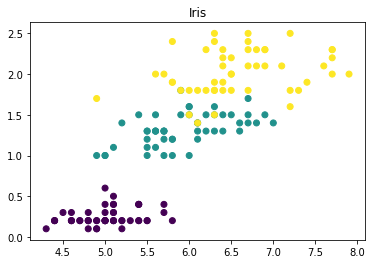

In [9]:
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target)
plt.title('Iris')

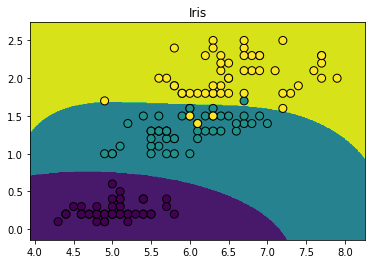

In [10]:
#Provavelmente criando duas features novas no iris o svm com 2 features terá mais sucesso, mas por enquanto usei só
#sepal length e petal width (os mais relevantes das 4 features já existentes)

x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                         np.linspace(x1_min-.1*h, x1_max+.1*h, 300))

svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
        
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()